In [17]:
# Import log json file and view Gantt chart of the log
import json
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [18]:

def graphResults(logs, labels, ref, title, subtitle):
    '''Graph the results'''

    i=0
    for log in logs:
        if labels:
            plt.plot(log, label=labels[i])
        else:
            plt.plot(log)
        i+=1
    
    # Horizontal line for reference
    plt.axhline(y=ref, color='red', linestyle='dashed')
    
    # Add labels
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(subtitle)
    plt.suptitle(title)
    # Add legend
    plt.legend()
    #plt.show()

    # Save the figure
    timestamp = time()
    plt.savefig(title+str(timestamp)+'.png')

def getDataGantt(logs, title, iters=50):
    n = len(logs)
    #tt, s, x = getCycleTime(t, l, L, W)
    dflist = []

    j = 0
    for log in logs: # Node logs
        i = 0
        for iterlog in log[1:]: # Operations
            if i > iters:
                break
            start = iterlog['start']
            stop = iterlog['end']
            if j==0 and i==0:
                offset = start
            start = start - offset
            stop = stop - offset
            #start = s[i,j]
            #stop = start + t[j]
            dflist.append(dict(Task="Iter %s" % i, Start=start, Finish=stop, Resource="Node %s" % j))
            i += 1
        j += 1
    df = pd.DataFrame(dflist)
    df['delta'] = df['Finish'] - df['Start']
    # Export df to csv
    #df.to_csv(title+'.csv')

    fig = px.timeline(df, x_start="Start", x_end="Finish", y="Resource", color="Task")
    fig.update_yaxes(autorange="reversed") 

    fig.layout.xaxis.type = 'linear'
    for d in fig.data:
        filt = df['Task'] == d.name
        d.x = df[filt]['delta'].tolist()

    fig.update_layout(title_text=title)
    return fig


In [19]:
# Import log file logs_lambert1710*.json
LW_titles = ['full', 'MT', 'block2', 'SLEM', 'Ryu']
logs = []
for title in LW_titles:
    log = []
    for node in range(16):
        logname = 'logs_wta'+str(node)+'_'+title+'.json'
        with open(logname) as f:
            data = json.load(f)
        log.append(data)
    logs.append(log)

# Data is a list of lists with the following structure:
# data = [[node1_1, node1_2, ... ],[node2_1, node2_2, ...],...]
# where log1 is a dictionary with the following structure:
# log1 = {'start': 0, 'end': 0, 'value': 0, 'time': 0}



In [20]:
logs[0][0]

[{'start': 1711496330.1071932,
  'end': 1711496343.1724002,
  'time': 13.06520700454712,
  'value': 224.0449327165246},
 {'start': 1711496343.1945612,
  'end': 1711496343.1949158,
  'time': 0.00035452842712402344,
  'value': 190.4344331444544},
 {'start': 1711496343.218689,
  'end': 1711496343.219065,
  'time': 0.00037598609924316406,
  'value': 151.1992911465859},
 {'start': 1711496343.240265,
  'end': 1711496343.2404962,
  'time': 0.00023126602172851562,
  'value': 123.57074592537282},
 {'start': 1711496343.2666724,
  'end': 1711496343.2669702,
  'time': 0.00029778480529785156,
  'value': 105.10068711672115},
 {'start': 1711496343.2882907,
  'end': 1711496343.2885294,
  'time': 0.00023865699768066406,
  'value': 92.1088980790677},
 {'start': 1711496343.32291,
  'end': 1711496343.3231463,
  'time': 0.00023627281188964844,
  'value': 83.76294829386859},
 {'start': 1711496343.3468525,
  'end': 1711496343.347104,
  'time': 0.00025153160095214844,
  'value': 78.88422382601897},
 {'start':

In [21]:
fig = getDataGantt(logs[0], "Parallel WTA Full", iters=20)
fig.show()

In [22]:
fig = getDataGantt(logs[1], "Parallel WTA MT")
fig.show()

In [23]:
# Block
fig = getDataGantt(logs[2], "Parallel WTA Block")
fig.show()


In [24]:
# SLEM
fig = getDataGantt(logs[3], "Parallel WTA SLEM")
fig.show()

In [25]:
# Ryu
fig = getDataGantt(logs[4], "Parallel WTA Ryu")
fig.show()

In [26]:
# Plot the value entry in last log for each of the three methods
# Against the time delta 
# Get the last value of each log
ref=56.45764131667768
values = []
time_deltas = []
for log in logs:
    start = log[0][1]['start']
    values.append([e['value'] for e in log[0][1:]])
    time_deltas.append([e['end']-start for e in log[0][1:]])


In [27]:
start = logs[0][0][1]['start']
for i in range(1,50):
    e = logs[0][0][i]
    print(e['value'], e['end']-start)

190.4344331444544 0.00035452842712402344
151.1992911465859 0.024503707885742188
123.57074592537282 0.04593491554260254
105.10068711672115 0.07240891456604004
92.1088980790677 0.09396815299987793
83.76294829386859 0.1285851001739502
78.88422382601897 0.1525428295135498
75.74673661587606 0.17477679252624512
73.37203302604478 0.21703100204467773
71.39009979316322 0.2616612911224365
69.64422904129577 0.28768253326416016
67.99777341939661 0.3176901340484619
66.45751840772749 0.3352065086364746
65.15997079372107 0.36014699935913086
64.15388986971107 0.38602519035339355
63.26466364836918 0.41199231147766113
62.47259851678807 0.43799781799316406
61.79022853611298 0.4640324115753174
61.22749215373574 0.48995018005371094
60.73990072515806 0.5159406661987305
60.37186517015231 0.5419764518737793
60.056362956230636 0.5680050849914551
59.79799647899975 0.5947000980377197
59.548191279040225 0.6200056076049805
59.31149243164456 0.6499607563018799
59.10148381141053 0.6720459461212158
58.90072683661851 

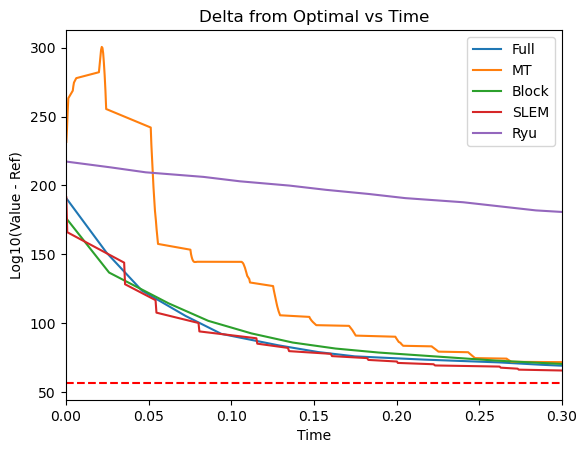

In [28]:
ref=56.45764131667768
plt.plot(time_deltas[0], values[0], label='Full')
plt.plot(time_deltas[1], values[1], label='MT')
plt.plot(time_deltas[2], values[2], label='Block')
plt.plot(time_deltas[3], values[3], label='SLEM')
plt.plot(time_deltas[4], values[4], label='Ryu')
plt.axhline(y=ref, color='red', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Log10(Value - Ref)')

# Only display x-axis less than 0.2
plt.xlim(0, 0.3)
plt.title('Delta from Optimal vs Time')
plt.legend()

plt.show()

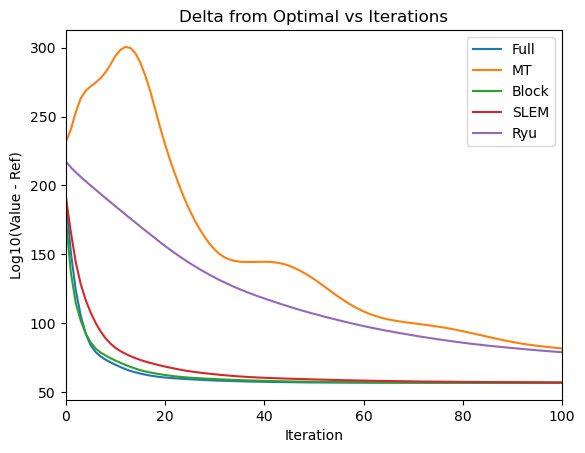

In [29]:
# Plot vs Iterations
plt.plot(values[0], label='Full')
plt.plot(values[1], label='MT')
plt.plot(values[2], label='Block')
plt.plot(values[3], label='SLEM')
plt.plot(values[4], label='Ryu')
#plt.axhline(y=ref, color='red', linestyle='dashed')
plt.xlabel('Iteration')
plt.ylabel('Log10(Value - Ref)')

# Only display x-axis less than 0.2
plt.xlim(0, 100)
plt.title('Delta from Optimal vs Iterations')
plt.legend()

plt.show()

In [30]:
# Find the time taken for each node and its standard deviation
# Create a dataframe with the times
# With a column for each node
times = pd.DataFrame()
for i, nodelog in enumerate(logs[0]):
    times['Node'+str(i)] = [e['end']-e['start'] for e in nodelog[1:]]

times.describe()
    
            


,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,Node9,Node10,Node11,Node12,Node13,Node14,Node15
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.000265,0.000039,0.000040,0.000044,0.000036,0.000051,0.000036,0.000038,0.000038,0.000040,0.000043,0.000042,0.000038,0.000039,0.000064,0.000040
std,0.000545,0.000037,0.000017,0.000019,0.000019,0.000149,0.000017,0.000042,0.000056,0.000033,0.000166,0.000023,0.000015,0.000017,0.000541,0.000016
min,0.000157,0.000016,0.000016,0.000017,0.000017,0.000018,0.000017,0.000017,0.000018,0.000019,0.000018,0.000020,0.000016,0.000018,0.000019,0.000017
25%,0.000213,0.000025,0.000026,0.000031,0.000024,0.000030,0.000023,0.000023,0.000024,0.000027,0.000023,0.000031,0.000024,0.000026,0.000026,0.000027
50%,0.000230,0.000036,0.000037,0.000041,0.000032,0.000038,0.000031,0.000032,0.000032,0.000037,0.000032,0.000039,0.000036,0.000034,0.000039,0.000039
75%,0.000245,0.000045,0.000050,0.000053,0.000043,0.000046,0.000044,0.000043,0.000044,0.000046,0.000043,0.000048,0.000048,0.000048,0.000048,0.000048
max,0.016816,0.000956,0.000189,0.000370,0.000392,0.003238,0.000169,0.001249,0.001745,0.000960,0.005015,0.000460,0.000091,0.000171,0.013085,0.000129


In [31]:
# Find the time for the communication between nodes
# Using MT as an example

# Create a dataframe with the times
# With a column for each node
commtimes = pd.DataFrame()
for i in range(1,10):
    # Find the difference between start on node i and end on node i-1
    commtimes['Node'+str(i)] = [logs[1][i][j]['start']-logs[1][i-1][j]['end'] for j in range(1,1000)]

commtimes.describe()

,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,Node9
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.004072,0.003572,0.003584,0.001780,0.000794,0.000791,0.000802,0.000825,0.000849
std,0.009052,0.008243,0.008258,0.004626,0.002877,0.002903,0.002907,0.002974,0.003022
min,0.000057,0.000018,0.000017,0.000016,0.000017,0.000017,0.000016,0.000017,0.000016
25%,0.000067,0.000020,0.000020,0.000018,0.000020,0.000020,0.000019,0.000021,0.000021
50%,0.000076,0.000024,0.000023,0.000022,0.000032,0.000030,0.000032,0.000036,0.000037
75%,0.000111,0.000057,0.000054,0.000055,0.000060,0.000062,0.000073,0.000073,0.000071
max,0.049722,0.049876,0.049809,0.033892,0.023043,0.023174,0.023389,0.023426,0.023382


In [32]:
# # Plot a histogram of the communication times for each node 
# # as subplots
# fig, axs = plt.subplots(3,3)
# binwidth = 1e-6
# for i in range(1,10):
#     ax = axs[(i-1)//3, (i-1)%3]
#     # Use common bin size
#     dat = commtimes['Node'+str(i)]
#     ax.hist(dat, bins=np.arange(min(dat), max(dat) + binwidth, binwidth))

#     #ax.hist(commtimes['Node'+str(i)], bins=20)
#     # Get common x-axis
#     ax.set_xlim(0, 5e-5)
#     ax.set_title('Node'+str(i))
# plt.show()